In [ ]:
Project : Website Traffic Business Case Study Analysis
Goal of the Project:
The goal of this project is to understand this traffic better, in particular the volume 
and distribution of events, and to develop ideas how to increase the links' clickrates. 
With that in mind,analyze the data using the Python libraries Pandas and SciPy
where indicated, providing answers to the presented questions:

How many total pageview events did the links in the provided dataset receive in the full period, how many per day?
Which countries did the pageviews come from?
What was the overall click through rate (clicks/pageviews)?
How does the clickrate distribute across different links?
Is there any correlation between clicks and previews on a link? Is it significant? How large is the effect? Make sure to at least test for potential linear as well as categorical (think binary) relationships between both variables.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
traffic_data=pd.read_csv(r"C:\Users\shaur\Downloads\traffic (1)\traffic.csv")

In [ ]:
Exploratory Data Analysis

In [9]:
traffic_data.head(5)

,event,date,country,city,artist,album,track,isrc,linkid
0,click,2021-08-21,Saudi Arabia,Jeddah,Tesher,Jalebi Baby,Jalebi Baby,QZNWQ2070741,2d896d31-97b6-4869-967b-1c5fb9cd4bb8
1,click,2021-08-21,Saudi Arabia,Jeddah,Tesher,Jalebi Baby,Jalebi Baby,QZNWQ2070741,2d896d31-97b6-4869-967b-1c5fb9cd4bb8
2,click,2021-08-21,India,Ludhiana,Reyanna Maria,So Pretty,So Pretty,USUM72100871,23199824-9cf5-4b98-942a-34965c3b0cc2
3,click,2021-08-21,France,Unknown,"Simone & Simaria, Sebastian Yatra",No Llores Más,No Llores Más,BRUM72003904,35573248-4e49-47c7-af80-08a960fa74cd
4,click,2021-08-21,Maldives,Malé,Tesher,Jalebi Baby,Jalebi Baby,QZNWQ2070741,2d896d31-97b6-4869-967b-1c5fb9cd4bb8


In [6]:
traffic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226278 entries, 0 to 226277
Data columns (total 9 columns):
 #   Column   Non-Null Count   Dtype         
---  ------   --------------   -----         
 0   event    226278 non-null  object        
 1   date     226278 non-null  datetime64[ns]
 2   country  226267 non-null  object        
 3   city     226267 non-null  object        
 4   artist   226241 non-null  object        
 5   album    226273 non-null  object        
 6   track    226273 non-null  object        
 7   isrc     219157 non-null  object        
 8   linkid   226278 non-null  object        
dtypes: datetime64[ns](1), object(8)
memory usage: 15.5+ MB


In [7]:
traffic_data.shape

(226278, 9)

In [275]:
# checking for duplicates
duplicates = traffic_data.duplicated()
#dropping duplicate Data
traffic_data=traffic_data.drop_duplicates()

In [ ]:
#Q1 How many total pageview events did the links in the provided dataset receive in the
full period, how many per day?

In [ ]:
# Answer Total Pageview Events recieved  in full period are :-142015

In [25]:
traffic_data['event'].value_counts()

event
pageview    142015
click        55732
preview      28531
Name: count, dtype: int64

In [ ]:
#Grouping Data by pageview 
pageview_data=traffic_data['event']=='pageview'

In [28]:
pageview_perday = pageview_data[['event','date']]

In [34]:
grouped=pageview_perday.groupby('date')['event'].size()

In [35]:
grouped

date
2021-08-19    22366
2021-08-20    21382
2021-08-21    21349
2021-08-22    20430
2021-08-23    18646
2021-08-24    18693
2021-08-25    19149
Name: event, dtype: int64

In [50]:
df=pd.DataFrame(data=grouped)
df.reset_index(inplace=True)
df=df.rename(columns={'event':'Count of Pageviews'})
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   date                7 non-null      datetime64[ns]
 1   Count of Pageviews  7 non-null      int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 244.0 bytes


([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, '2021-08-19'),
  Text(1, 0, '2021-08-20'),
  Text(2, 0, '2021-08-21'),
  Text(3, 0, '2021-08-22'),
  Text(4, 0, '2021-08-23'),
  Text(5, 0, '2021-08-24'),
  Text(6, 0, '2021-08-25')])

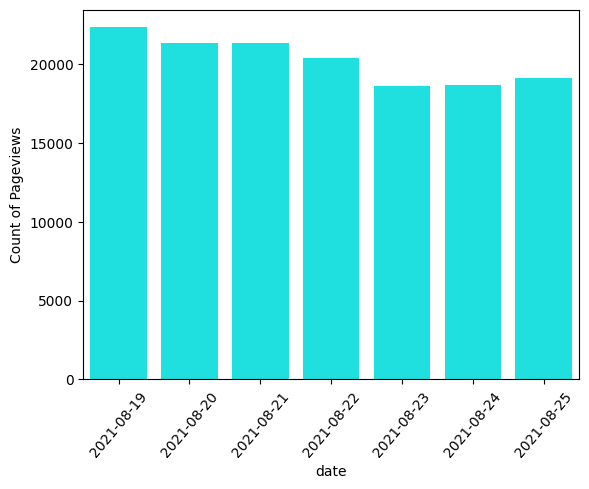

In [54]:
sns.barplot(x=df['date'],y=df['Count of Pageviews'],color='cyan')
plt.xticks(rotation=50)

In [55]:
#Answer Number of pageviews per day

,date,Count of Pageviews
0,2021-08-19,22366
1,2021-08-20,21382
2,2021-08-21,21349
3,2021-08-22,20430
4,2021-08-23,18646
5,2021-08-24,18693
6,2021-08-25,19149


In [ ]:
Q2 Which countries did the pageviews come from?

In [62]:
pageview_country=pageview_data.groupby('country').size()

In [69]:
pageview_country.idxmax()

'Saudi Arabia'

In [ ]:
#Answer  'Saudi Arabia' is the country with maximum pageviews

In [ ]:
Q What was the overall click rate (clicks/pageviews)

In [71]:
PageView,Clicks,Preview=traffic_data['event'].value_counts()

In [77]:
print('Total Pageviews:-',PageView , 'Total Clicks:-',Clicks)

Total Pageviews:- 142015 Total Clicks:- 55732


In [83]:
print('Answer-> Overall Click Rate:-',round(PageView/Clicks,2))

Answer-> Overall Click Rate:- 2.55


In [ ]:
Q How does the click through rate distribute across different links?

In [85]:
click_data=traffic_data['event']=='click'

In [87]:
df1=traffic_data[click_data]

In [122]:
df1.columns
df1

,event,linkid
0,click,2d896d31-97b6-4869-967b-1c5fb9cd4bb8
1,click,2d896d31-97b6-4869-967b-1c5fb9cd4bb8
2,click,23199824-9cf5-4b98-942a-34965c3b0cc2
3,click,35573248-4e49-47c7-af80-08a960fa74cd
4,click,2d896d31-97b6-4869-967b-1c5fb9cd4bb8
...,...,...
83807,click,522da5cc-8177-4140-97a7-a84fdb4caf1c
83808,click,af483035-a62c-485c-8e98-257f35e23b4d
83809,click,e849515b-929d-44c8-a505-e7622f1827e9
83810,click,8f990f44-6a5d-4294-ab0b-f74e0a8f3b25


In [92]:
df1=df1[['event','linkid']]

In [141]:
link_click=df1.groupby('linkid').size()
linkbyclick=pd.DataFrame(link_click)
linkbyclick.reset_index(inplace=True)
linkbyclick.rename(columns={0:'Click_count'},inplace=True)

linkbyclick

,linkid,Click_count
0,00126b32-0c35-507b-981c-02c80d2aa8e7,2
1,004b9724-abca-5481-b6e9-6148a7ca00a5,1
2,0063a982-41cd-5629-96d0-e1c4dd72ea11,2
3,006af6a0-1f0d-4b0c-93bf-756af9071c06,8
4,00759b81-3f04-4a61-b934-f8fb3185f4a0,3
...,...,...
2250,ffd8d5a7-91bc-48e1-a692-c26fca8a8ead,29
2251,fff38ca0-8043-50cd-a5f1-f65ebb7105c5,1
2252,fff84c0e-90a1-59d8-9997-adc909d50e16,1
2253,fffc17a7-f935-5d3e-bd3e-d761fd80d479,1


In [95]:
pageview_data

,event,date,country,city,artist,album,track,isrc,linkid
84043,pageview,2021-08-19,Saudi Arabia,Riyadh,Tesher,Jalebi Baby,Jalebi Baby,QZNWQ2070741,2d896d31-97b6-4869-967b-1c5fb9cd4bb8
84044,pageview,2021-08-19,United States,Absecon,KA$HDAMI,epiphany,Reparations!,QZFYY2115255,9c61dba1-9369-4ee4-a215-1d34581cd811
84045,pageview,2021-08-19,Saudi Arabia,Riyadh,Tesher,Jalebi Baby,Jalebi Baby,QZNWQ2070741,2d896d31-97b6-4869-967b-1c5fb9cd4bb8
84046,pageview,2021-08-19,Ireland,Mullingar,Cardi B,Up,Up,USAT22100061,9d847c0e-6824-438f-9dc1-d76fca6dc87c
84047,pageview,2021-08-19,United Kingdom,Northampton,"Kayla Nicole, Taylor Girlz, Flo Milli","Bundles 2 (feat. Flo Milli, Taylor Girlz)","Bundles 2 (feat. Flo Milli, Taylor Girlz)",QMCE32100359,fbf4b935-f961-4b13-b1d8-45ad47093559
...,...,...,...,...,...,...,...,...,...
226273,pageview,2021-08-24,Kuwait,Kuwait City,Sean Paul,The Trinity,Temperature,USAT20505520,04ba6b17-1055-4f0e-a75e-3cdb0d0d4106
226274,pageview,2021-08-24,India,Chennai,Miscél,when you left,when you left,QM42K1907890,2fc15e8b-83aa-40ee-9f9d-5d96c6d4356c
226275,pageview,2021-08-24,India,Jaipur,"Trippie Redd, Lil Uzi Vert",Holy Smokes (feat. Lil Uzi Vert),Holy Smokes,QZJ842001118,eedc8702-6bd2-499a-972f-260c35f72e0f
226276,pageview,2021-08-24,France,Unknown,Young Thug,Tick Tock,Tick Tock,USAT22104514,e0a76dc3-7ccd-405f-8ee8-a2c55c0e0ed2


In [96]:
df2=pageview_data[['event','linkid']]

In [97]:
df2

,event,linkid
84043,pageview,2d896d31-97b6-4869-967b-1c5fb9cd4bb8
84044,pageview,9c61dba1-9369-4ee4-a215-1d34581cd811
84045,pageview,2d896d31-97b6-4869-967b-1c5fb9cd4bb8
84046,pageview,9d847c0e-6824-438f-9dc1-d76fca6dc87c
84047,pageview,fbf4b935-f961-4b13-b1d8-45ad47093559
...,...,...
226273,pageview,04ba6b17-1055-4f0e-a75e-3cdb0d0d4106
226274,pageview,2fc15e8b-83aa-40ee-9f9d-5d96c6d4356c
226275,pageview,eedc8702-6bd2-499a-972f-260c35f72e0f
226276,pageview,e0a76dc3-7ccd-405f-8ee8-a2c55c0e0ed2


In [149]:
link_pageview=df2.groupby('linkid').size()
linkbypageview=pd.DataFrame(link_pageview)
linkbypageview.rename(columns={0:'pageviewsCount_by_link'},inplace=True)
linkbypageview

,pageviewsCount_by_link
linkid,
00073307-ae96-5089-a117-4783afb42f8e,2
00126b32-0c35-507b-981c-02c80d2aa8e7,2
0018cfff-50a1-5984-9715-01ef2d11a49a,1
0033934b-5d16-5a06-af58-d087bcdd3680,1
0034d6cf-3bd8-5ffe-aafc-b3959fc48608,1
...,...
fff38ca0-8043-50cd-a5f1-f65ebb7105c5,1
fff4e5f0-4ee5-5fe7-aa30-e870edaf6ed7,2
fff84c0e-90a1-59d8-9997-adc909d50e16,1


In [ ]:
'''Merging Dataframes 
Performing an inner join because if linkid doesnot have an associated 
pageviewsCount_by_link or	Click_count then clickrate will be zero or infinity
to avoid such a situation we do an inner join'''



In [321]:
df3 = pd.merge(linkbypageview,linkbyclick,on='linkid',how='inner')

In [323]:
df3['ClickThroughRate']=round(df3['Click_count']/df3['pageviewsCount_by_link'],2)

In [324]:
df3.sort_values(by=['ClickThroughRate'],ascending=False,inplace=True)

In [317]:
df4=df3.head(10)

<Axes: xlabel='ClickThroughRate', ylabel='linkid'>

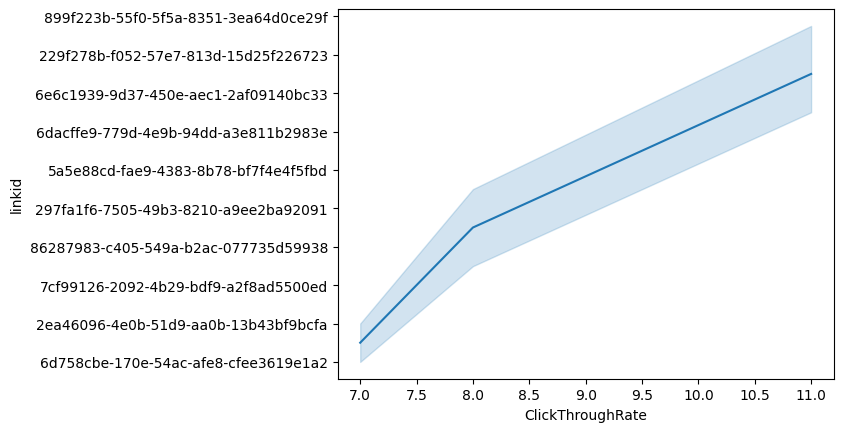

In [325]:
sns.lineplot(y=df4['linkid'],x=df4['ClickThroughRate'])

In [ ]:
#Above Top 10 linkid's with their click through rate

In [ ]:
Is there any correlation between clicks and previews on a link? Is it significant? How large is the effect? Make sure to at least test for potential linear as well as categorical (think binary) relationships between both variables.

In [183]:
preview_data=traffic_data['event']=='preview'

In [184]:
preview_data

0         False
1         False
2         False
3         False
4         False
          ...  
226273    False
226274    False
226275    False
226276    False
226277    False
Name: event, Length: 226278, dtype: bool

In [185]:
preview_data=traffic_data[preview_data]

In [187]:
preview_data=preview_data[['event','linkid']]

In [208]:
grouped=preview_data.groupby('linkid').size()


In [211]:

gp=pd.DataFrame(grouped)
gp.reset_index()
gp.rename(columns={0:'previewCount_by_link'},inplace=True)
gp

,previewCount_by_link
linkid,
006af6a0-1f0d-4b0c-93bf-756af9071c06,11
00759b81-3f04-4a61-b934-f8fb3185f4a0,1
00829040-ee01-4409-966d-d67c7965144a,9
00de7566-f014-4d20-8616-82e4dea45b88,1
0211bf4d-0e9d-46c2-889c-f97872280820,141
...,...
fd647d87-4c7a-4dd1-92c6-0e7dd7fdf4f1,101
fe24ad63-e347-40db-8e75-94e573bd3d9b,1
fe8a3fcd-7beb-4db0-8494-5238e1e1cab3,57


In [310]:
'''The question here is to find correlation between clicks and previews on a 
link so Performing inner join because we need link id from a dataframe only 
if it is present in both dataframes because or main aim is to find relation between
clicks and previews on a link'''
df5 =pd.merge(gp,linkbyclick,on='linkid',how="inner")
df5.fillna(0,inplace=True)
df5.duplicated().sum()
df5

,linkid,previewCount_by_link,Click_count
0,006af6a0-1f0d-4b0c-93bf-756af9071c06,11,8
1,00759b81-3f04-4a61-b934-f8fb3185f4a0,1,3
2,00829040-ee01-4409-966d-d67c7965144a,9,22
3,00de7566-f014-4d20-8616-82e4dea45b88,1,1
4,0211bf4d-0e9d-46c2-889c-f97872280820,141,123
...,...,...,...
459,fd647d87-4c7a-4dd1-92c6-0e7dd7fdf4f1,101,271
460,fe24ad63-e347-40db-8e75-94e573bd3d9b,1,9
461,fe8a3fcd-7beb-4db0-8494-5238e1e1cab3,57,118
462,fe8f7a23-be9d-49a6-b9b5-d26823c3f911,22,37


In [311]:
df5
df5.corr(numeric_only=True)

,previewCount_by_link,Click_count
previewCount_by_link,1.000000,0.993422
Click_count,0.993422,1.000000


In [322]:
from scipy import stats
stats.pearsonr(x=df5["previewCount_by_link"], y=df5["Click_count"])

PearsonRResult(statistic=0.9934224704248963, pvalue=0.0)

In [237]:
#Answer Almost perfectly positive correlation between the number of clicks and previews which seems logical; given that the one is actually dependent on the other